In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("data.csv",encoding='unicode_escape')

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(435742, 13)

In [6]:
Wb = df.query('state=="West Bengal" ')
Wb.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
413276,13,1/1/1987,West Bengal,Haldia,CMEC,Residential,NaN,38.2,NaN,201.0,NaN,NaN,1987-01-01
413277,14,1/9/1987,West Bengal,Haldia,CMEC,Industrial,NaN,56.3,NaN,340.0,NaN,NaN,1987-09-01
413278,15,1/3/1987,West Bengal,Haldia,CMEC,Industrial,97.9,108.9,NaN,353.0,NaN,NaN,1987-03-01
413279,8,1/1/1987,West Bengal,Howrah,West Bengal Pollution Control Board,Industrial,103.4,148.0,NaN,968.0,NaN,NaN,1987-01-01
413280,9,1/2/1987,West Bengal,Howrah,West Bengal Pollution Control Board,Industrial,92.1,112.1,NaN,531.0,NaN,NaN,1987-02-01


In [7]:
Wb.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29


In [8]:
Wb.shape

(22463, 13)

In [9]:
Wb.describe(include = 'all')

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
count,14743,22463,22463,22463,14363,22463,21314.000000,22312.000000,21295.000000,13006.000000,21309,640.000000,22463
unique,40,3895,1,18,5,7,NaN,NaN,NaN,NaN,67,NaN,3895
top,SAMP,17/02/2011,West Bengal,Kolkata,West Bengal State Pollution Control Board,Industrial Area,NaN,NaN,NaN,NaN,"WBIIDC, Haldia",NaN,2011-02-17
freq,831,23,22463,7733,12044,8260,NaN,NaN,NaN,NaN,553,NaN,23
mean,NaN,NaN,NaN,NaN,NaN,NaN,12.608766,59.075731,115.039909,233.506524,NaN,64.890625,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,23.572930,32.112400,83.936294,162.290633,NaN,33.293834,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000,3.000000,21.000000,NaN,15.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,40.000000,50.000000,112.000000,NaN,39.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,53.950000,90.000000,184.500000,NaN,62.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,11.500000,71.000000,161.000000,318.925000,NaN,86.000000,NaN


In [10]:
Wb.drop(labels=['stn_code','sampling_date','agency','location_monitoring_station'], axis = 1, inplace = True)
Wb.sample(2)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
424947,West Bengal,Howrah,"Residential, Rural and other Areas",18.6,74.7,171.333333,290.333333,NaN,2010-12-13
424312,West Bengal,Durgapur,Industrial Area,12.6,76.2,523.000000,1050.666667,NaN,2010-12-28


In [11]:
Wb.isnull().sum()

state           0
location        0
type            0
so2          1149
no2           151
rspm         1168
spm          9457
pm2_5       21823
date            0
dtype: int64

In [12]:
Wb.drop(labels = ['pm2_5'], axis =1, inplace = True)
Wb.head(2)

,state,location,type,so2,no2,rspm,spm,date
413276,West Bengal,Haldia,Residential,NaN,38.2,NaN,201.0,1987-01-01
413277,West Bengal,Haldia,Industrial,NaN,56.3,NaN,340.0,1987-09-01


In [13]:
Wb.dtypes

state        object
location     object
type         object
so2         float64
no2         float64
rspm        float64
spm         float64
date         object
dtype: object

In [14]:
Wb['date'] = pd.to_datetime(Wb.date,format='%Y-%m-%d')
Wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22463 entries, 413276 to 435738
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     22463 non-null  object        
 1   location  22463 non-null  object        
 2   type      22463 non-null  object        
 3   so2       21314 non-null  float64       
 4   no2       22312 non-null  float64       
 5   rspm      21295 non-null  float64       
 6   spm       13006 non-null  float64       
 7   date      22463 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 1.5+ MB


In [15]:
Wb.sort_values(by='date')

,state,location,type,so2,no2,rspm,spm,date
413276,West Bengal,Haldia,Residential,NaN,38.2,NaN,201.0,1987-01-01
413279,West Bengal,Howrah,Industrial,103.4,148.0,NaN,968.0,1987-01-01
413282,West Bengal,Howrah,Industrial,26.9,72.9,NaN,778.0,1987-01-01
413291,West Bengal,Haldia,Industrial,76.5,31.5,NaN,268.0,1987-01-03
413300,West Bengal,Howrah,Industrial,12.5,49.1,NaN,385.0,1987-01-04
...,...,...,...,...,...,...,...,...
435634,West Bengal,SILIGURI,RIRUO,2.0,16.0,102.0,NaN,2015-12-30
433866,West Bengal,Asansol,Industrial Area,10.0,66.0,196.0,NaN,2015-12-30
433762,West Bengal,Durgapur,"Residential, Rural and other Areas",9.0,65.0,216.0,NaN,2015-12-30
434595,West Bengal,Asansol,Industrial Area,10.0,73.0,253.0,NaN,2015-12-30


In [16]:
Wb['so2'].fillna(method='ffill',inplace = True);
Wb['no2'].fillna(method='ffill',inplace = True);
Wb['rspm'].fillna(method='ffill',inplace = True);
Wb['spm'].fillna(method='ffill',inplace = True);

In [17]:
Wb

,state,location,type,so2,no2,rspm,spm,date
413276,West Bengal,Haldia,Residential,NaN,38.2,NaN,201.0,1987-01-01
413277,West Bengal,Haldia,Industrial,NaN,56.3,NaN,340.0,1987-09-01
413278,West Bengal,Haldia,Industrial,97.9,108.9,NaN,353.0,1987-03-01
413279,West Bengal,Howrah,Industrial,103.4,148.0,NaN,968.0,1987-01-01
413280,West Bengal,Howrah,Industrial,92.1,112.1,NaN,531.0,1987-02-01
...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,47.0,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,47.0,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,47.0,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,47.0,2015-12-24


In [18]:
Wb.isnull().sum()

state          0
location       0
type           0
so2            2
no2            0
rspm        1154
spm            0
date           0
dtype: int64

In [19]:
print(Wb.iloc[[1151]],Wb.iloc[[1152]],Wb.iloc[[1153]],Wb.iloc[[1154]])

              state location             type  so2   no2  rspm    spm  \
414427  West Bengal   Howrah  Industrial Area  5.4  57.7   NaN  132.0   

             date  
414427 2002-10-01                 state location             type  so2   no2  rspm    spm  \
414428  West Bengal   Howrah  Industrial Area  5.5  56.6   NaN  173.0   

             date  
414428 2002-11-01                 state location             type   so2   no2  rspm    spm  \
414429  West Bengal   Howrah  Industrial Area  13.7  79.1   NaN  276.0   

             date  
414429 2002-12-01                 state location             type   so2   no2   rspm    spm  \
414430  West Bengal   Howrah  Industrial Area  13.7  80.3  362.3  610.7   

             date  
414430 2004-02-01  


In [20]:
Wb.drop(labels = ['rspm'], axis = 1, inplace = True)
Wb.head()

,state,location,type,so2,no2,spm,date
413276,West Bengal,Haldia,Residential,NaN,38.2,201.0,1987-01-01
413277,West Bengal,Haldia,Industrial,NaN,56.3,340.0,1987-09-01
413278,West Bengal,Haldia,Industrial,97.9,108.9,353.0,1987-03-01
413279,West Bengal,Howrah,Industrial,103.4,148.0,968.0,1987-01-01
413280,West Bengal,Howrah,Industrial,92.1,112.1,531.0,1987-02-01


In [21]:
Wb.isnull().sum()

state       0
location    0
type        0
so2         2
no2         0
spm         0
date        0
dtype: int64

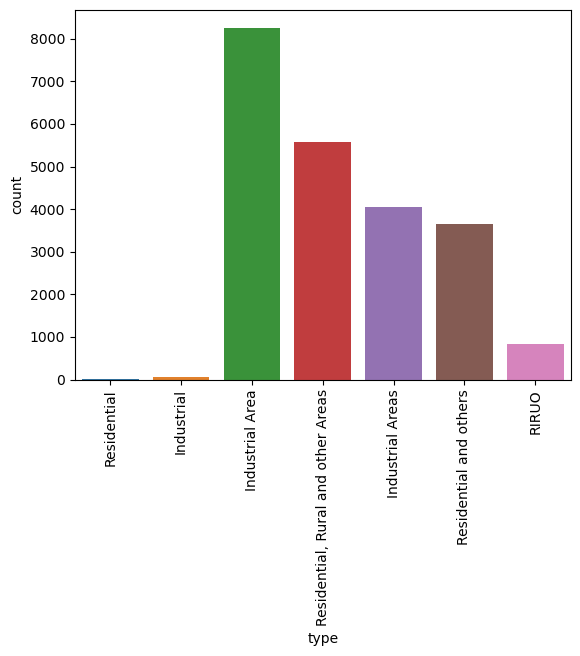

In [22]:
typ=sns.countplot(x ="type",data = Wb)
typ.set_xticklabels(typ.get_xticklabels(), rotation=90);

In [23]:
Wb['type'].replace("Industrial Areas","Industrial",inplace=True)
Wb['type'].replace("Industrial Area","Industrial",inplace=True)
Wb['type'].replace("Residential and others","Residential",inplace=True)
Wb['type'].replace("Residential, Rural and other Areas","Residential",inplace=True)
Wb['type'].replace("RIRUO","Residential",inplace=True)

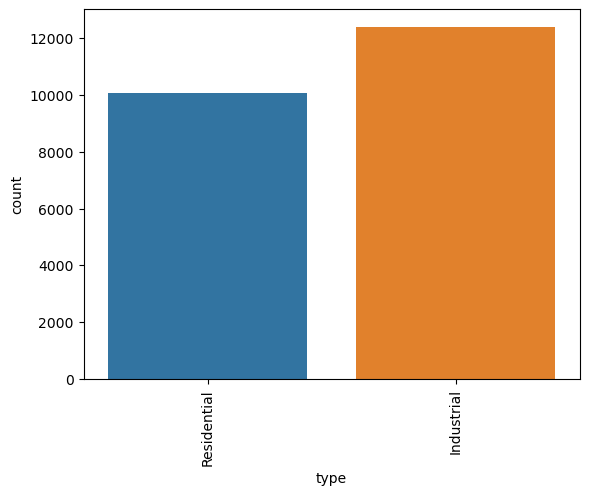

In [24]:
typ=sns.countplot(x ="type",data = Wb)
typ.set_xticklabels(typ.get_xticklabels(), rotation=90);

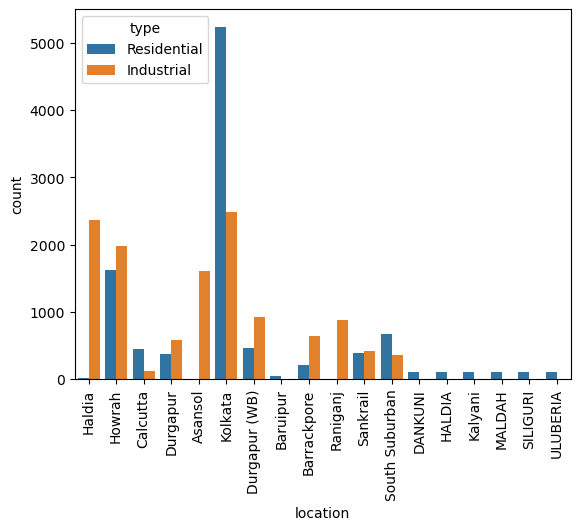

In [25]:
datacount_ty =sns.countplot(x ="location",hue = 'type',data = Wb);
datacount_ty.set_xticklabels(datacount_ty.get_xticklabels(), rotation=90);

In [26]:
null_data = Wb[Wb.isnull().any(axis=1)]
null_data.head(20)

,state,location,type,so2,no2,spm,date
413276,West Bengal,Haldia,Residential,NaN,38.2,201.0,1987-01-01
413277,West Bengal,Haldia,Industrial,NaN,56.3,340.0,1987-09-01


In [27]:
Wb['so2'].fillna(1, inplace=True)

In [28]:
Wb.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
spm         0
date        0
dtype: int64

In [29]:
aaa = (Wb == 0).astype(int).sum(axis=0)
print(aaa)

state       0
location    0
type        0
so2         0
no2         0
spm         0
date        0
dtype: int64


In [30]:
Wb['location'].replace("Calcutta","Kolkata",inplace=True)
Wb['location'].replace("HALDIA","Haldia",inplace=True)
Wb['location'].replace("South Suburban","Kolkata",inplace=True)
Wb['location'].replace("Durgapur (WB)","Durgapur",inplace=True)

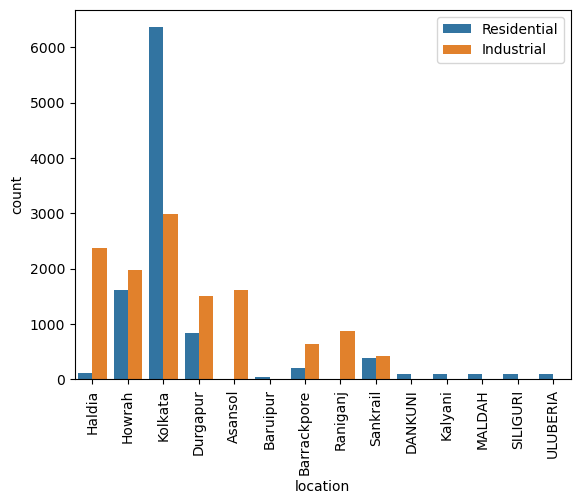

In [31]:
datacount_ty =sns.countplot(x ="location",hue = 'type',data = Wb);
plt.legend(loc="upper right")
datacount_ty.set_xticklabels(datacount_ty.get_xticklabels(), rotation=90);

In [32]:
Wb.head()

,state,location,type,so2,no2,spm,date
413276,West Bengal,Haldia,Residential,1.0,38.2,201.0,1987-01-01
413277,West Bengal,Haldia,Industrial,1.0,56.3,340.0,1987-09-01
413278,West Bengal,Haldia,Industrial,97.9,108.9,353.0,1987-03-01
413279,West Bengal,Howrah,Industrial,103.4,148.0,968.0,1987-01-01
413280,West Bengal,Howrah,Industrial,92.1,112.1,531.0,1987-02-01


In [33]:
Wb

,state,location,type,so2,no2,spm,date
413276,West Bengal,Haldia,Residential,1.0,38.2,201.0,1987-01-01
413277,West Bengal,Haldia,Industrial,1.0,56.3,340.0,1987-09-01
413278,West Bengal,Haldia,Industrial,97.9,108.9,353.0,1987-03-01
413279,West Bengal,Howrah,Industrial,103.4,148.0,968.0,1987-01-01
413280,West Bengal,Howrah,Industrial,92.1,112.1,531.0,1987-02-01
...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,Residential,20.0,44.0,47.0,2015-12-15
435735,West Bengal,ULUBERIA,Residential,17.0,44.0,47.0,2015-12-18
435736,West Bengal,ULUBERIA,Residential,18.0,45.0,47.0,2015-12-21
435737,West Bengal,ULUBERIA,Residential,22.0,50.0,47.0,2015-12-24


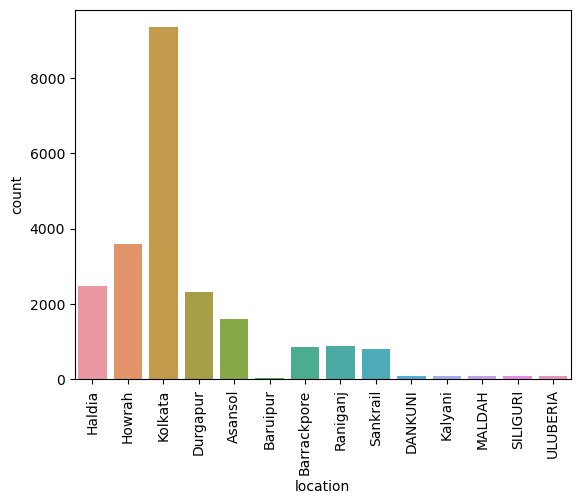

In [34]:
datacount =sns.countplot(x ="location",data = Wb);
datacount.set_xticklabels(datacount.get_xticklabels(), rotation=90);

In [35]:
loc = pd.pivot_table(Wb, values=['so2','no2','spm'],index='location') # Aggfunc: default-np.mean()
loc

,no2,so2,spm
location,,,
Asansol,57.749410,7.944357,291.123037
Barrackpore,58.591637,14.226796,281.823753
Baruipur,68.500000,9.100000,576.000000
DANKUNI,43.679612,15.087379,47.000000
Durgapur,58.247069,8.656687,295.172845
Haldia,43.904346,12.261811,194.541993
Howrah,77.147545,16.595665,254.378141
Kalyani,36.038462,2.894231,47.000000
Kolkata,57.938711,11.294017,233.541559


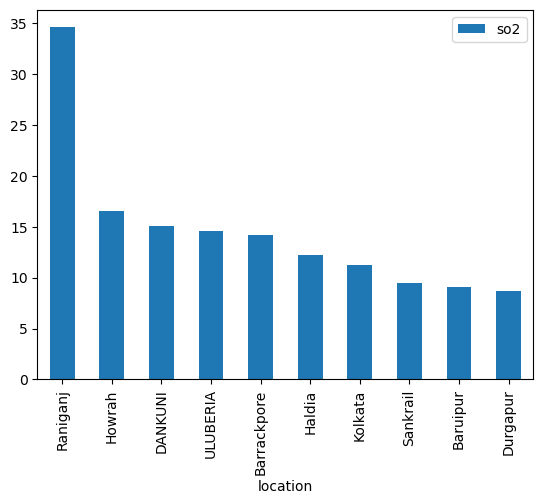

In [36]:
maxso2 = loc.sort_values(by='so2',ascending=False)
maxso2.loc[:,['so2']].head(10).plot(kind='bar'); # Based on average values

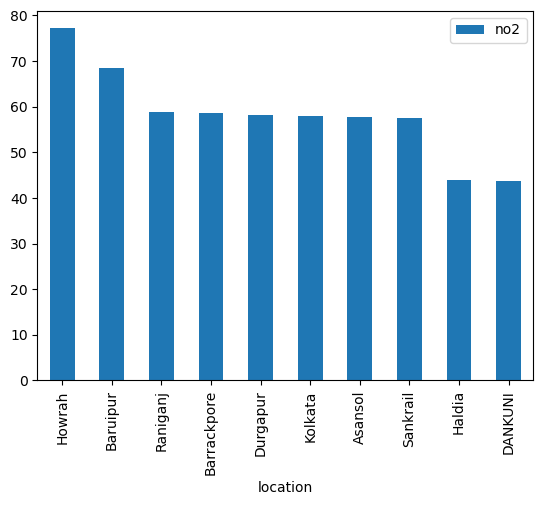

In [37]:
maxno2 = loc.sort_values(by='no2',ascending=False);
maxno2.loc[:,['no2']].head(10).plot(kind='bar');

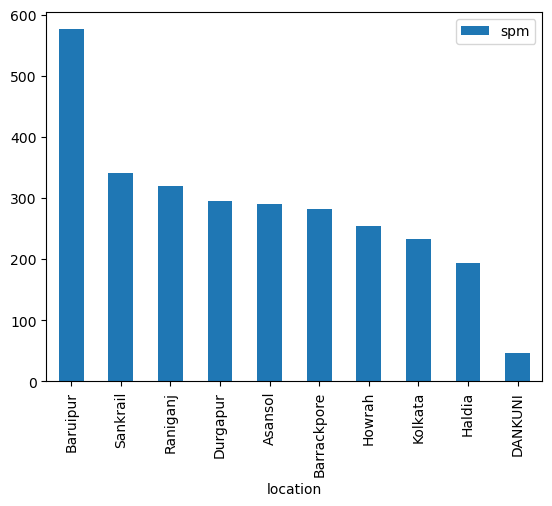

In [38]:
maxspm = loc.sort_values(by='spm',ascending=False);
maxspm.loc[:,['spm']].head(10).plot(kind='bar');

In [39]:
def cal_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
Wb['si']=Wb['so2'].apply(cal_si)
data= Wb[['so2','si']]
data.head()

,so2,si
413276,1.0,1.250000
413277,1.0,1.250000
413278,97.9,105.966667
413279,103.4,107.800000
413280,92.1,104.033333


In [40]:
def cal_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
Wb['ni']=Wb['no2'].apply(cal_ni)
data= Wb[['no2','ni']]
data.head()

,no2,ni
413276,38.2,47.750
413277,56.3,70.375
413278,108.9,128.900
413279,148.0,168.000
413280,112.1,132.100


In [41]:
def cal_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
Wb['spi']=Wb['spm'].apply(cal_spi)
data= Wb[['spm','spi']]
data.head()

,spm,spi
413276,201.0,167.333333
413277,340.0,290.000000
413278,353.0,303.750000
413279,968.0,525.116279
413280,531.0,423.488372


In [42]:
Wb.sample

<bound method NDFrame.sample of               state  location         type    so2    no2    spm       date  \
413276  West Bengal    Haldia  Residential    1.0   38.2  201.0 1987-01-01   
413277  West Bengal    Haldia   Industrial    1.0   56.3  340.0 1987-09-01   
413278  West Bengal    Haldia   Industrial   97.9  108.9  353.0 1987-03-01   
413279  West Bengal    Howrah   Industrial  103.4  148.0  968.0 1987-01-01   
413280  West Bengal    Howrah   Industrial   92.1  112.1  531.0 1987-02-01   
...             ...       ...          ...    ...    ...    ...        ...   
435734  West Bengal  ULUBERIA  Residential   20.0   44.0   47.0 2015-12-15   
435735  West Bengal  ULUBERIA  Residential   17.0   44.0   47.0 2015-12-18   
435736  West Bengal  ULUBERIA  Residential   18.0   45.0   47.0 2015-12-21   
435737  West Bengal  ULUBERIA  Residential   22.0   50.0   47.0 2015-12-24   
435738  West Bengal  ULUBERIA  Residential   20.0   46.0   47.0 2015-12-29   

                si       ni    

In [43]:
# AQI
def calculate_aqi(si,ni,spi):
    aqi=0
    if(si>ni and si>spi):
     aqi=si
    if (spi>ni and spi>si):
     aqi=spi
    if(ni>si and ni>spi):
     aqi= ni
    return aqi
Wb['AQI']=Wb.apply(lambda x:calculate_aqi(x['so2'],x['no2'],x['spm']),axis=1)

In [44]:
aq_wise = pd.pivot_table(Wb, values=['AQI'],index='location')
aq_wise

,AQI
location,
Asansol,292.552434
Barrackpore,284.544602
Baruipur,576.000000
DANKUNI,48.242718
Durgapur,295.478682
Haldia,194.747506
Howrah,255.964923
Kalyani,49.269231
Kolkata,238.754075


<AxesSubplot:xlabel='location'>

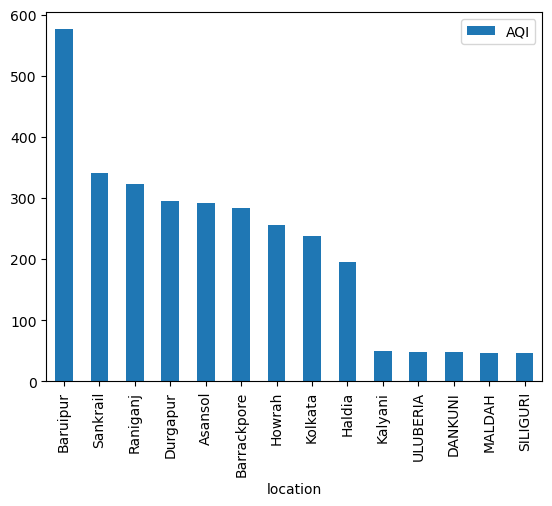

In [45]:
maxaqi = aq_wise.sort_values(by='AQI',ascending=False)
maxaqi.loc[:,['AQI']].head(37).plot(kind='bar')

In [46]:
date_wise = pd.pivot_table(Wb, values=['AQI'],index='date')
date_wise

,AQI
date,
1987-01-01,649.000000
1987-01-03,268.000000
1987-01-04,255.000000
1987-01-05,167.000000
1987-01-06,256.500000
...,...
2015-12-26,53.750000
2015-12-27,55.142857
2015-12-28,56.500000


<AxesSubplot:xlabel='date'>

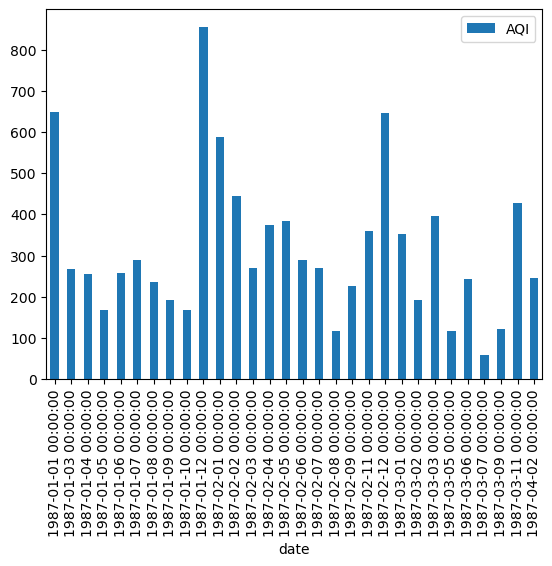

In [47]:
date_wise.loc[:,['AQI']].head(30).plot(kind='bar')

In [48]:
dum1 = pd.get_dummies(Wb['type'])
dum2 = pd.get_dummies(Wb['location'])
Wb['year'] = Wb['date'].dt.year

In [49]:
td = pd.concat([Wb, dum1, dum2], axis = 1)
td

,state,location,type,so2,no2,spm,date,si,ni,spi,...,Durgapur,Haldia,Howrah,Kalyani,Kolkata,MALDAH,Raniganj,SILIGURI,Sankrail,ULUBERIA
413276,West Bengal,Haldia,Residential,1.0,38.2,201.0,1987-01-01,1.250000,47.750,167.333333,...,0,1,0,0,0,0,0,0,0,0
413277,West Bengal,Haldia,Industrial,1.0,56.3,340.0,1987-09-01,1.250000,70.375,290.000000,...,0,1,0,0,0,0,0,0,0,0
413278,West Bengal,Haldia,Industrial,97.9,108.9,353.0,1987-03-01,105.966667,128.900,303.750000,...,0,1,0,0,0,0,0,0,0,0
413279,West Bengal,Howrah,Industrial,103.4,148.0,968.0,1987-01-01,107.800000,168.000,525.116279,...,0,0,1,0,0,0,0,0,0,0
413280,West Bengal,Howrah,Industrial,92.1,112.1,531.0,1987-02-01,104.033333,132.100,423.488372,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,Residential,20.0,44.0,47.0,2015-12-15,25.000000,55.000,47.000000,...,0,0,0,0,0,0,0,0,0,1
435735,West Bengal,ULUBERIA,Residential,17.0,44.0,47.0,2015-12-18,21.250000,55.000,47.000000,...,0,0,0,0,0,0,0,0,0,1
435736,West Bengal,ULUBERIA,Residential,18.0,45.0,47.0,2015-12-21,22.500000,56.250,47.000000,...,0,0,0,0,0,0,0,0,0,1
435737,West Bengal,ULUBERIA,Residential,22.0,50.0,47.0,2015-12-24,27.500000,62.500,47.000000,...,0,0,0,0,0,0,0,0,0,1


In [50]:
td.drop(labels = ['state','location','type','date'], axis = 1, inplace = True)
td.sample(2)

,so2,no2,spm,si,ni,spi,AQI,year,Industrial,Residential,...,Durgapur,Haldia,Howrah,Kalyani,Kolkata,MALDAH,Raniganj,SILIGURI,Sankrail,ULUBERIA
424596,12.0,46.6,88.0,15.000,58.25,88.000000,88.0,2010,1,0,...,0,1,0,0,0,0,0,0,0,0
415046,13.7,49.0,546.7,17.125,61.25,427.139535,546.7,2004,1,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
td.corr()

,so2,no2,spm,si,ni,spi,AQI,year,Industrial,Residential,...,Durgapur,Haldia,Howrah,Kalyani,Kolkata,MALDAH,Raniganj,SILIGURI,Sankrail,ULUBERIA
so2,1.000000,0.142414,0.211165,0.941355,0.123287,0.210110,0.220901,-0.167028,0.085850,-0.085850,...,-0.058541,-0.005363,0.075757,-0.028838,-0.048343,-0.029979,0.193621,-0.027668,-0.026335,0.005948
no2,0.142414,1.000000,0.231291,0.233837,0.996434,0.225132,0.270032,-0.096117,0.132495,-0.132495,...,-0.007285,-0.164987,0.247666,-0.048601,-0.026156,-0.090400,-0.000524,-0.087033,-0.009029,-0.033151
spm,0.211165,0.231291,1.000000,0.252566,0.241016,0.987293,0.996830,-0.148454,0.138166,-0.138166,...,0.083565,-0.100232,0.013480,-0.072363,-0.066509,-0.072363,0.076066,-0.072363,0.093477,-0.072363
si,0.941355,0.233837,0.252566,1.000000,0.215635,0.250498,0.265525,-0.240855,0.106729,-0.106729,...,-0.069867,0.013391,0.115871,-0.040573,-0.061416,-0.042347,0.147067,-0.038756,-0.028967,0.013465
ni,0.123287,0.996434,0.241016,0.215635,1.000000,0.234603,0.277970,-0.092637,0.138163,-0.138163,...,0.001013,-0.170789,0.250558,-0.051556,-0.032395,-0.098048,-0.002251,-0.094303,-0.007006,-0.034371
spi,0.210110,0.225132,0.987293,0.250498,0.234603,1.000000,0.983449,-0.139712,0.131236,-0.131236,...,0.062933,-0.097877,0.016507,-0.075136,-0.060858,-0.075136,0.076250,-0.075136,0.102813,-0.075136
AQI,0.220901,0.270032,0.996830,0.265525,0.277970,0.983449,1.000000,-0.138639,0.139806,-0.139806,...,0.080052,-0.106333,0.010810,-0.073437,-0.056490,-0.074261,0.076702,-0.074426,0.091736,-0.073548
year,-0.167028,-0.096117,-0.148454,-0.240855,-0.092637,-0.139712,-0.138639,1.000000,-0.141927,0.141927,...,-0.059817,-0.104485,-0.284578,0.086750,0.119901,0.086750,0.108950,0.086750,0.060161,0.086750
Industrial,0.085850,0.132495,0.138166,0.106729,0.138163,0.131236,0.139806,-0.141927,1.000000,-1.000000,...,0.063130,0.285243,-0.000463,-0.075626,-0.393619,-0.075626,0.182422,-0.075626,-0.013457,-0.075626
Residential,-0.085850,-0.132495,-0.138166,-0.106729,-0.138163,-0.131236,-0.139806,0.141927,-1.000000,1.000000,...,-0.063130,-0.285243,0.000463,0.075626,0.393619,0.075626,-0.182422,0.075626,0.013457,0.075626


<AxesSubplot:>

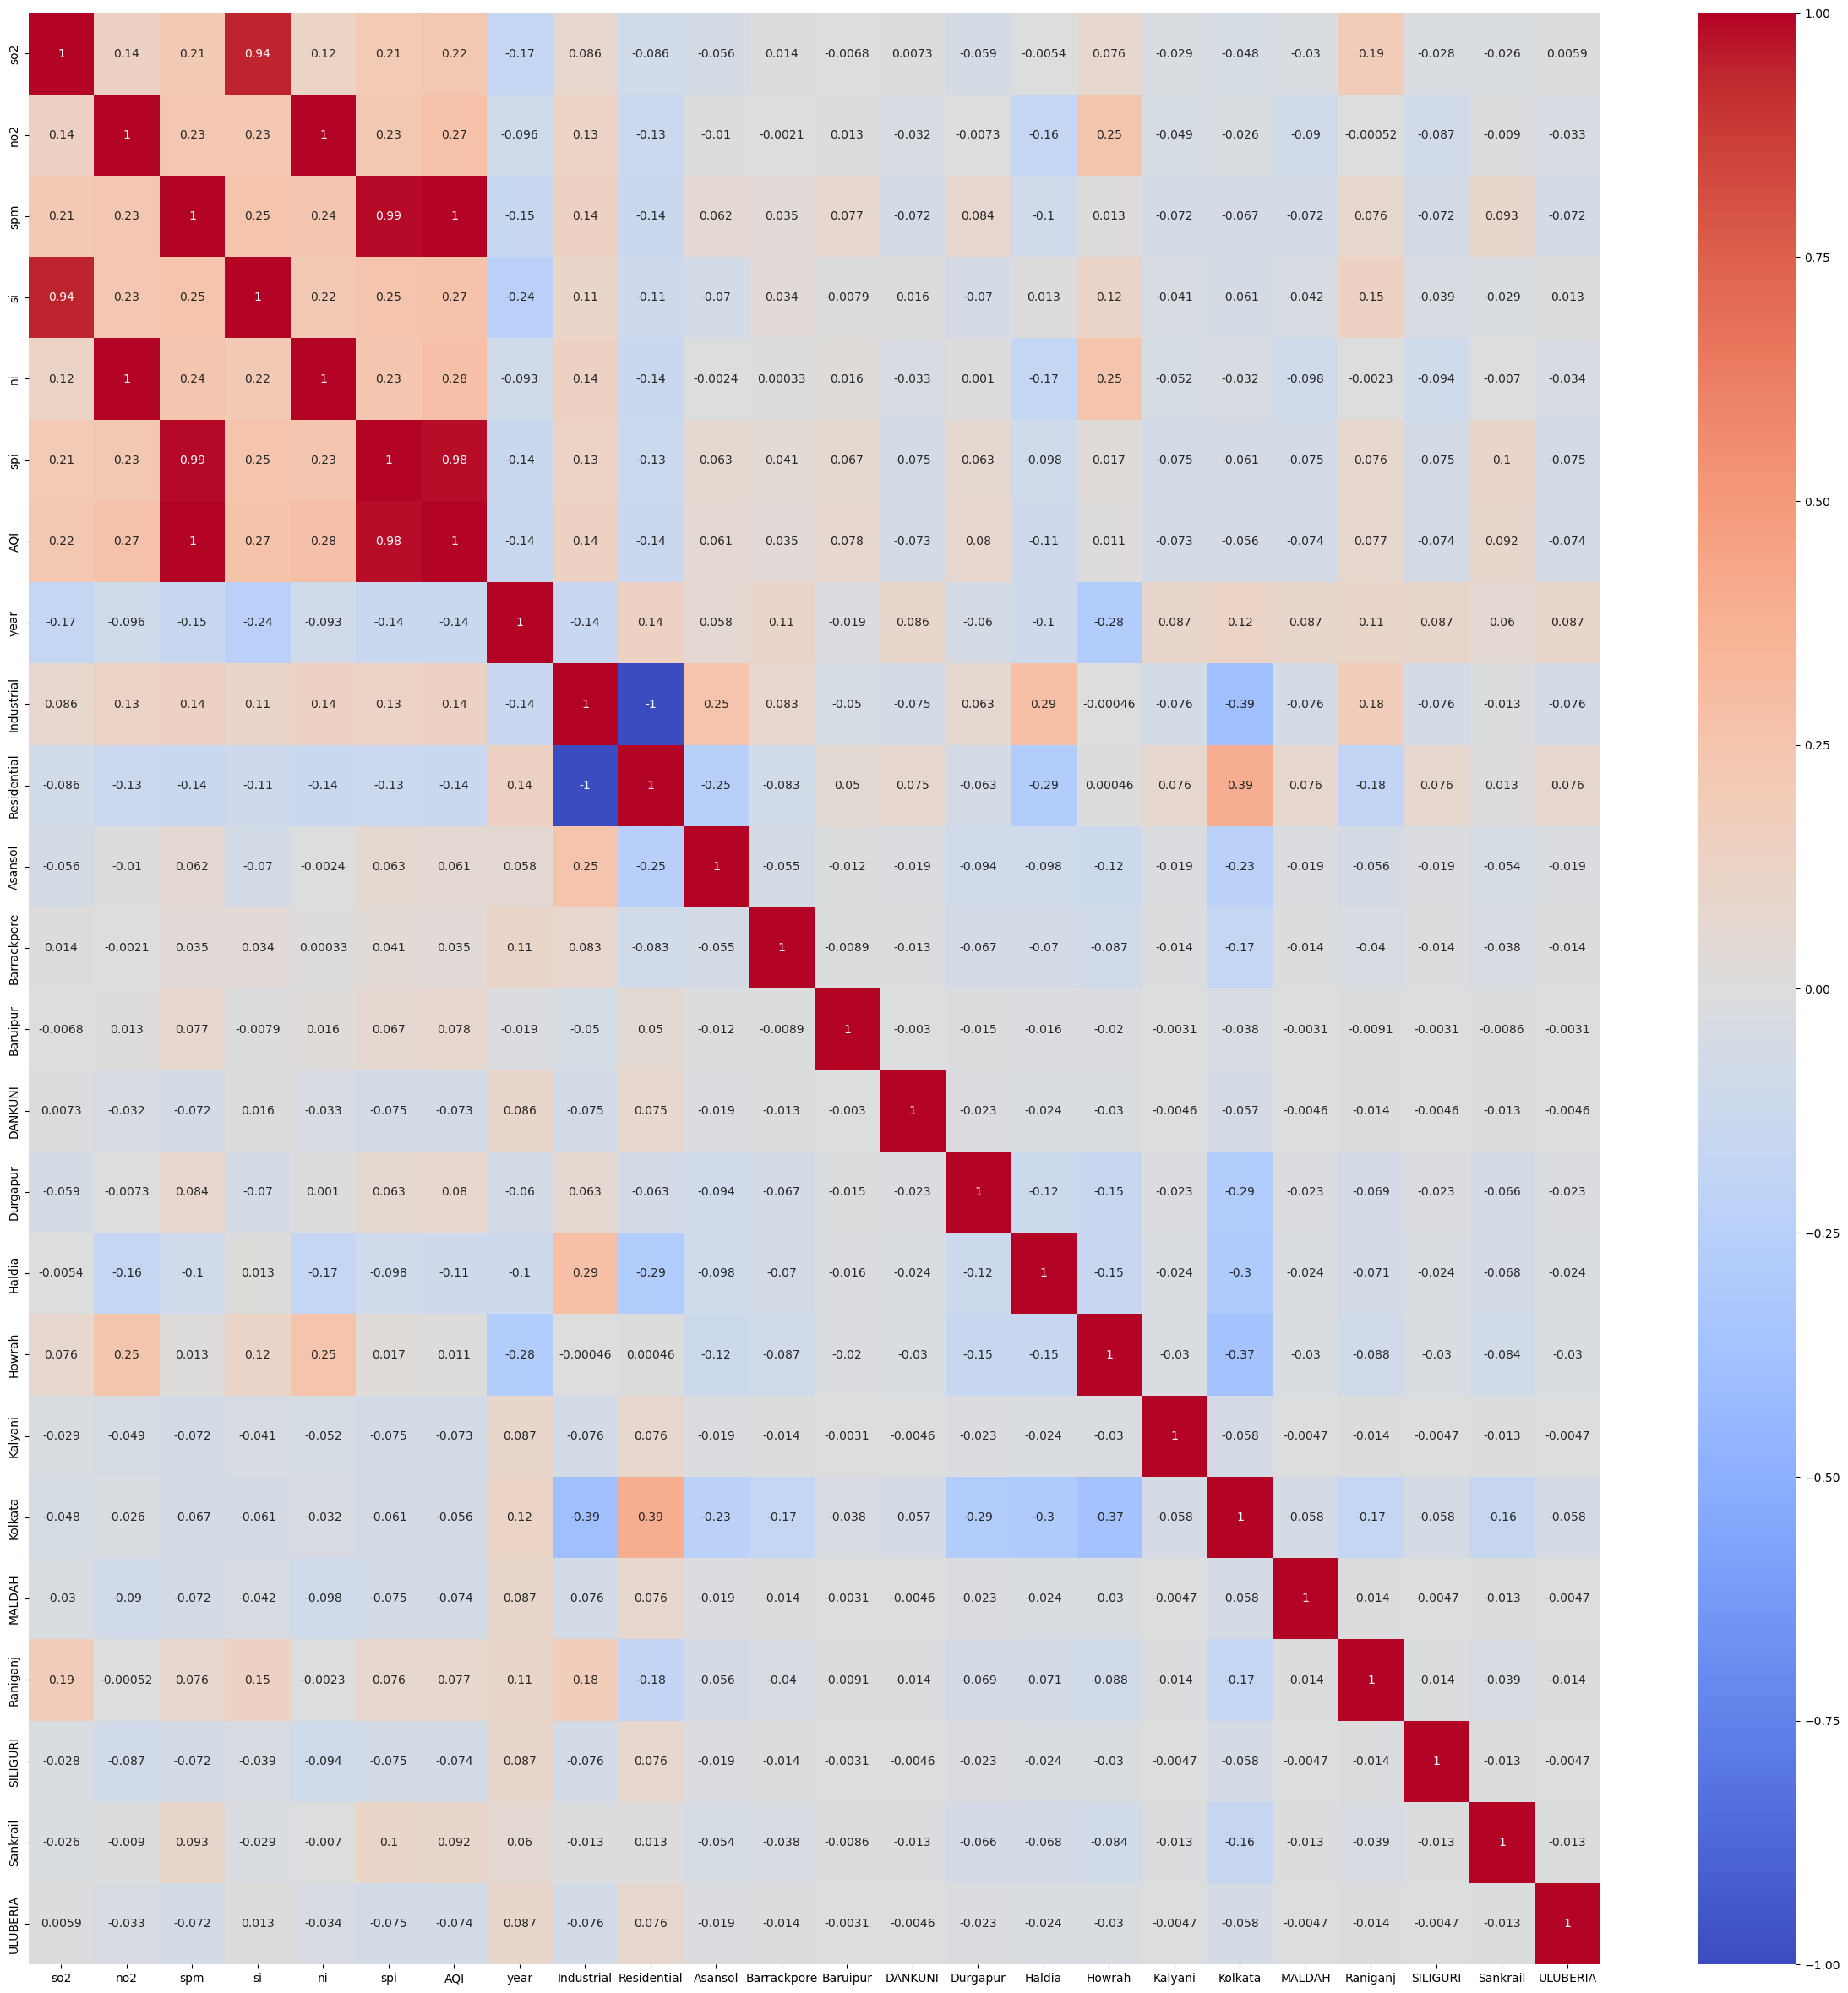

In [52]:
corrMatrix = td.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrMatrix, annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='year'>

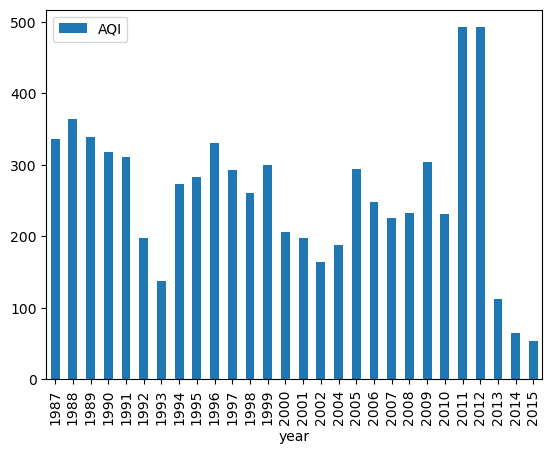

In [53]:
yr_wise = pd.pivot_table(td, values=['AQI'],index='year')
yr_wise.loc[:,['AQI']].head(30).plot(kind='bar')

Simple Linear Regression

In [54]:
x=td[['spi']]
y=td['AQI'].values.astype('float')
y = y.reshape(-1, 1)
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)

In [55]:
x

,spi
413276,167.333333
413277,290.000000
413278,303.750000
413279,525.116279
413280,423.488372
...,...
435734,47.000000
435735,47.000000
435736,47.000000
435737,47.000000


In [56]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17970, 1), (4493, 1), (17970, 1), (4493, 1))

In [58]:
lin_mod = LinearRegression()
lin_mod.fit(x_train, y_train)
y_predicted = lin_mod.predict(x_test)

In [59]:
print(lin_mod.score(x_train, y_train))
print(lin_mod.score(x_test, y_test))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.9673780636663442
0.9663379396253597
Mean absolute error = 15.174897128477522
Mean squared error = 1175.412179930889
Root Mean squared error = 34.28428473704663
R2 score = 0.9663379396253597


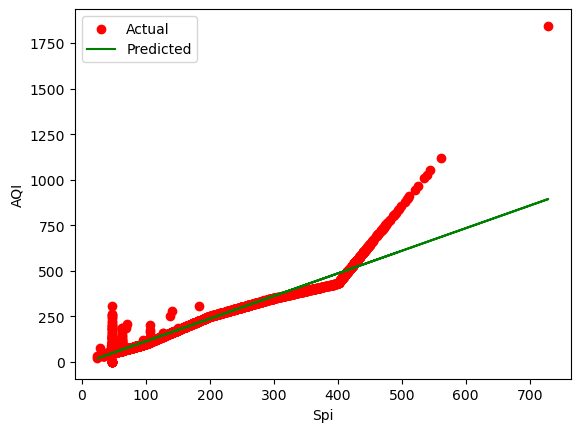

In [60]:
plt.scatter(x_test,y_test,c='red',label='Actual')
plt.plot(x_test, y_predicted, c = 'green',label='Predicted')
plt.xlabel('Spi')
plt.ylabel('AQI')
plt.legend()


Multi Linear Regression

In [61]:
x=td.drop("AQI",axis=1)
y=td["AQI"].values.astype('float')
y = y.reshape(-1, 1)
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)
x.head()

,so2,no2,spm,si,ni,spi,year,Industrial,Residential,Asansol,...,Durgapur,Haldia,Howrah,Kalyani,Kolkata,MALDAH,Raniganj,SILIGURI,Sankrail,ULUBERIA
413276,1.0,38.2,201.0,1.250000,47.750,167.333333,1987,0,1,0,...,0,1,0,0,0,0,0,0,0,0
413277,1.0,56.3,340.0,1.250000,70.375,290.000000,1987,1,0,0,...,0,1,0,0,0,0,0,0,0,0
413278,97.9,108.9,353.0,105.966667,128.900,303.750000,1987,1,0,0,...,0,1,0,0,0,0,0,0,0,0
413279,103.4,148.0,968.0,107.800000,168.000,525.116279,1987,1,0,0,...,0,0,1,0,0,0,0,0,0,0
413280,92.1,112.1,531.0,104.033333,132.100,423.488372,1987,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
y

array([[201.],
       [340.],
       [353.],
       ...,
       [ 47.],
       [ 50.],
       [ 47.]])

In [63]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17970, 23), (4493, 23), (17970, 1), (4493, 1))

In [65]:
lin_mod = LinearRegression()

lin_mod.fit(x_train, y_train)
y_predicted = lin_mod.predict(x_test)

In [66]:
lin_mod.intercept_

array([-1080.50983706])

In [67]:
lin_mod.coef_

array([[-0.08247003,  1.50053216,  1.00225074,  0.16549281, -1.12231336,
        -0.03248351,  0.53728803,  0.20585604, -0.20585604,  2.13885057,
         1.11914798,  7.35815589, -5.15749739,  1.77379401,  1.15573791,
        -2.45765288, -1.25701609,  3.37446122, -2.38672878,  0.5337564 ,
        -2.62968629,  1.37648242, -4.94180497]])

In [68]:
print(lin_mod.score(x_train, y_train ))
print(lin_mod.score(x_test, y_test))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.9960026999845325
0.9959689140810448
Mean absolute error = 6.050586015859769
Mean squared error = 140.75750072201072
Root Mean squared error = 11.864126631236314
R2 score = 0.9959689140810448


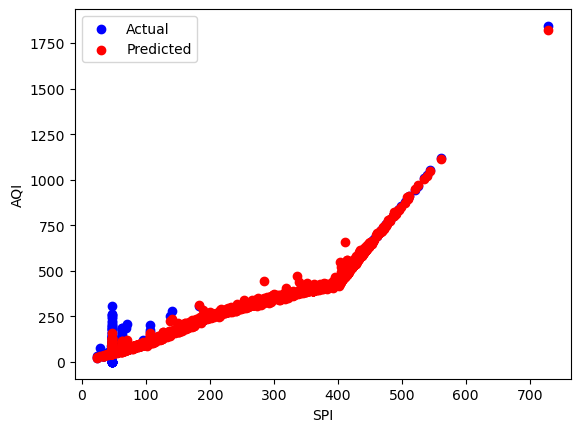

In [69]:
plt.scatter(x_test['spi'],y_test, color='blue', label='Actual')
plt.scatter(x_test['spi'],y_predicted, color='red', label='Predicted')
plt.xlabel('SPI')
plt.ylabel('AQI')
plt.legend()
plt.show()

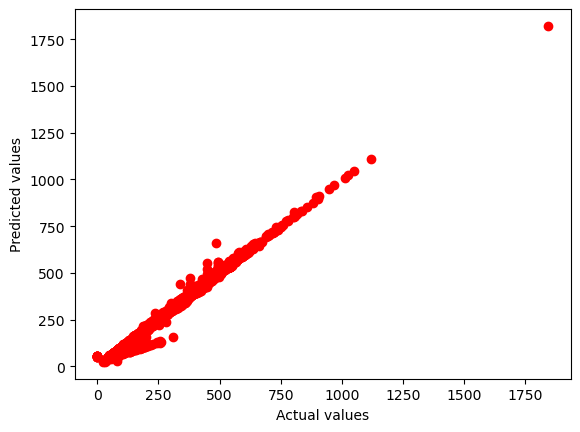

In [70]:
plt.scatter(y_test,y_predicted,c='Red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

Decission Tree

In [71]:
x=td.drop("AQI",axis=1)
y=td["AQI"].values.astype('float')
y = y.reshape(-1, 1)
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)

In [72]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [73]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=5)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.9960494274790467
0.9918961377770116
Mean absolute error = 6.308411673872369
Mean squared error = 282.9707467507989
Root Mean squared error = 16.82173435620712
R2 score = 0.9918961377770116


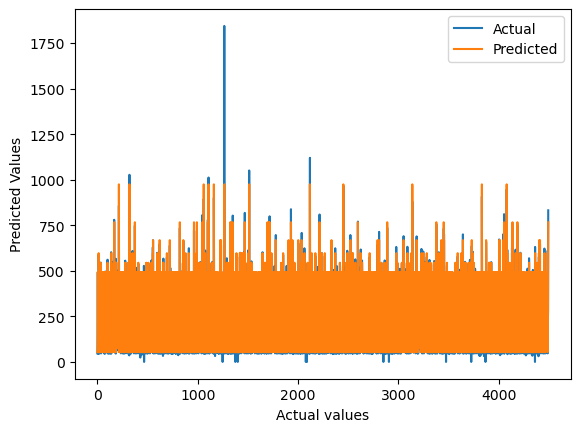

In [74]:

plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [75]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=10)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.9999824005562563
0.9981589965119113
Mean absolute error = 0.46407865056296216
Mean squared error = 64.28417925436828
Root Mean squared error = 8.01774153077837
R2 score = 0.9981589965119113


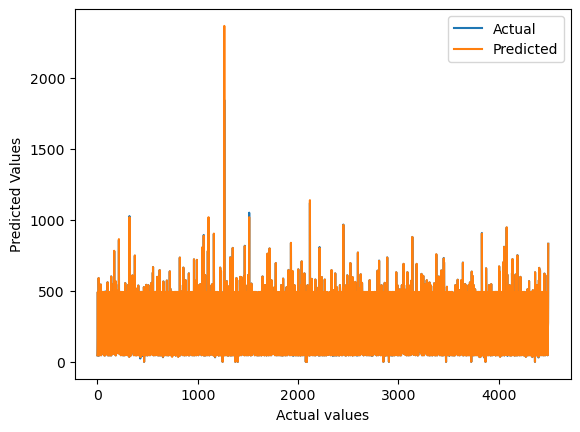

In [76]:

plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [77]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=15)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.9999999794082283
0.9981608734038493
Mean absolute error = 0.25740557686322485
Mean squared error = 64.21864192184026
Root Mean squared error = 8.013653469038966
R2 score = 0.9981608734038493


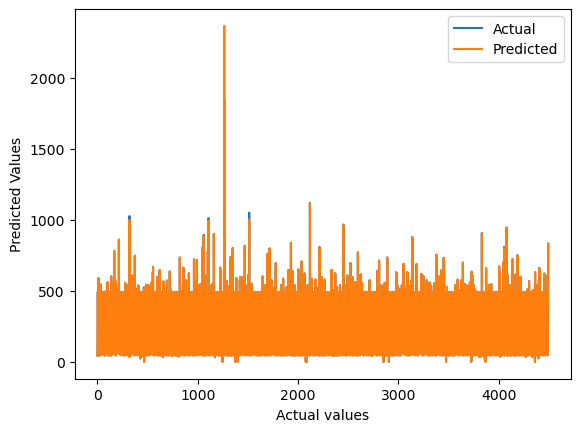

In [78]:

plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

LSTM

In [79]:
x=td.drop("AQI",axis=1)
y=td["AQI"]

In [80]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [81]:
x_train_mean = x_train.mean()
x_train_std = x_train.std()
y_train_mean = y_train.mean()
y_train_std = y_train.std()
x_train = (x_train - x_train_mean) / x_train_std
y_train = (y_train - y_train_mean) / y_train_std
x_test = (x_test - x_train_mean) / x_train_std
y_test = (y_test - y_train_mean) / y_train_std
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x_train.shape[1], 1), activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs=50, batch_size=30, verbose=1,validation_split=0.2)


Epoch 1/50
480/480 [==============================] - 5s 8ms/step - loss: 3.5966 - val_loss: 0.7070
Epoch 2/50
480/480 [==============================] - 3s 6ms/step - loss: 0.5084 - val_loss: 0.4583
Epoch 3/50
480/480 [==============================] - 3s 6ms/step - loss: 0.3949 - val_loss: 0.4253
Epoch 4/50
480/480 [==============================] - 3s 7ms/step - loss: 0.3678 - val_loss: 0.4010
Epoch 5/50
480/480 [==============================] - 3s 7ms/step - loss: 0.3484 - val_loss: 0.3874
Epoch 6/50
480/480 [==============================] - 3s 6ms/step - loss: 0.3325 - val_loss: 0.3808
Epoch 7/50
480/480 [==============================] - 3s 6ms/step - loss: 0.3215 - val_loss: 0.3901
Epoch 8/50
480/480 [==============================] - 3s 6ms/step - loss: 0.3006 - val_loss: 0.3370
Epoch 9/50
480/480 [==============================] - 3s 6ms/step - loss: 0.2542 - val_loss: 0.2385
Epoch 10/50
480/480 [==============================] - 3s 6ms/step - loss: 0.1879 - val_loss: 0.2025

141/141 [==============================] - 0s 2ms/step
Mean absolute error = 6.198745442562173
Mean squared error = 72.56003591510026
Root Mean squared error = 8.518217883753636
R2 score = 0.9979219882595535


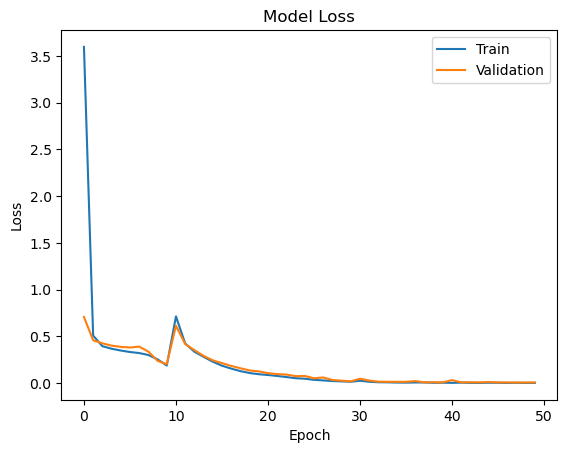

In [83]:
y_predicted = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)).flatten() * y_train_std + y_train_mean
y_test = y_test * y_train_std + y_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [84]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x_train.shape[1], 1),activation='relu'),
    tf.keras.layers.Dense(1,)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs=50, batch_size=60, verbose=1, validation_split=0.2)

Epoch 1/50
240/240 [==============================] - 3s 7ms/step - loss: 4.3699 - val_loss: 0.7924
Epoch 2/50
240/240 [==============================] - 2s 6ms/step - loss: 0.7015 - val_loss: 0.7224
Epoch 3/50
240/240 [==============================] - 2s 6ms/step - loss: 0.6076 - val_loss: 0.6104
Epoch 4/50
240/240 [==============================] - 2s 7ms/step - loss: 0.5167 - val_loss: 0.5335
Epoch 5/50
240/240 [==============================] - 2s 6ms/step - loss: 0.4518 - val_loss: 0.4816
Epoch 6/50
240/240 [==============================] - 2s 6ms/step - loss: 0.4119 - val_loss: 0.4496
Epoch 7/50
240/240 [==============================] - 2s 7ms/step - loss: 0.3887 - val_loss: 0.4306
Epoch 8/50
240/240 [==============================] - 2s 6ms/step - loss: 0.3727 - val_loss: 0.4174
Epoch 9/50
240/240 [==============================] - 2s 7ms/step - loss: 0.3613 - val_loss: 0.4066
Epoch 10/50
240/240 [==============================] - 2s 6ms/step - loss: 0.3519 - val_loss: 0.3971

141/141 [==============================] - 0s 2ms/step
Mean absolute error = 46822.83126937647
Mean squared error = 3411838066.9282775
Root Mean squared error = 58410.94132890068
R2 score = -1.7691023889766586


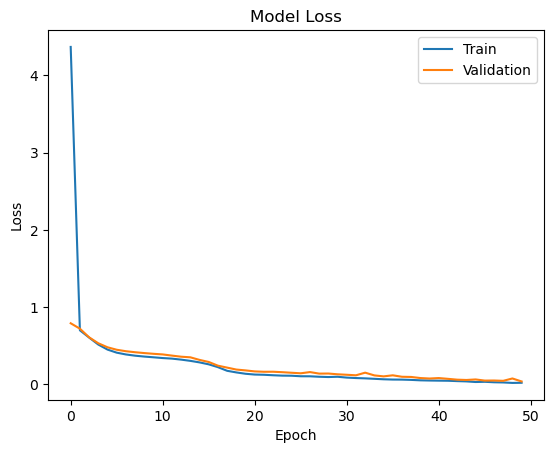

In [85]:
y_predicted = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)).flatten() * y_train_std + y_train_mean
y_test = y_test * y_train_std + y_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x_train.shape[1], 1),activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs=100, batch_size=30, verbose=1, validation_split=0.2)

Epoch 1/100
480/480 [==============================] - 4s 6ms/step - loss: 1.1145 - val_loss: 0.8317
Epoch 2/100
480/480 [==============================] - 3s 6ms/step - loss: 0.6141 - val_loss: 0.4597
Epoch 3/100
480/480 [==============================] - 3s 6ms/step - loss: 0.3903 - val_loss: 0.4278
Epoch 4/100
480/480 [==============================] - 3s 6ms/step - loss: 0.3743 - val_loss: 0.4286
Epoch 5/100
480/480 [==============================] - 3s 6ms/step - loss: 0.3655 - val_loss: 0.4064
Epoch 6/100
480/480 [==============================] - 3s 6ms/step - loss: 0.3535 - val_loss: 0.3948
Epoch 7/100
480/480 [==============================] - 3s 6ms/step - loss: 0.3397 - val_loss: 0.3775
Epoch 8/100
480/480 [==============================] - 3s 6ms/step - loss: 0.3168 - val_loss: 0.3646
Epoch 9/100
480/480 [==============================] - 3s 6ms/step - loss: 0.2833 - val_loss: 0.3700
Epoch 10/100
480/480 [==============================] - 3s 6ms/step - loss: 0.2475 - val_lo

141/141 [==============================] - 0s 2ms/step
Mean absolute error = 8842226.115552528
Mean squared error = 121658467336835.34
Root Mean squared error = 11029889.72459994
R2 score = -1.7982920632159582


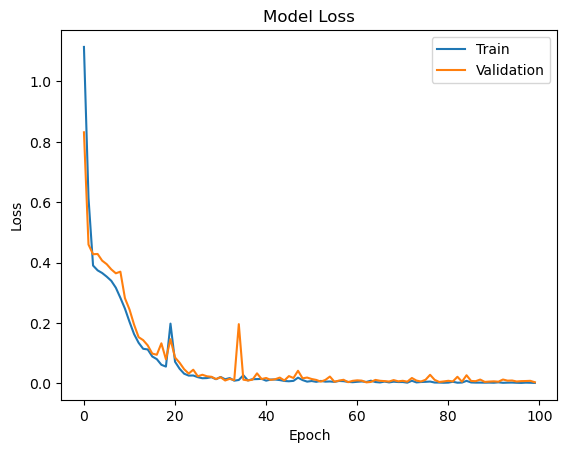

In [87]:
y_predicted = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)).flatten() * y_train_std + y_train_mean
y_test = y_test * y_train_std + y_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x_train.shape[1], 1),activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs=100, batch_size=60, verbose=1, validation_split=0.2)

Epoch 1/100
240/240 [==============================] - 3s 8ms/step - loss: 0.6493 - val_loss: 0.4543
Epoch 2/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3758 - val_loss: 0.4101
Epoch 3/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3493 - val_loss: 0.3908
Epoch 4/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3204 - val_loss: 0.3638
Epoch 5/100
240/240 [==============================] - 2s 7ms/step - loss: 0.2907 - val_loss: 0.3274
Epoch 6/100
240/240 [==============================] - 2s 7ms/step - loss: 0.2521 - val_loss: 0.2771
Epoch 7/100
240/240 [==============================] - 2s 7ms/step - loss: 0.2155 - val_loss: 0.2476
Epoch 8/100
240/240 [==============================] - 2s 7ms/step - loss: 0.1936 - val_loss: 0.2314
Epoch 9/100
240/240 [==============================] - 2s 7ms/step - loss: 0.1801 - val_loss: 0.2183
Epoch 10/100
240/240 [==============================] - 2s 7ms/step - loss: 0.1767 - val_lo

141/141 [==============================] - 1s 3ms/step
Mean absolute error = 1661015842.2716346
Mean squared error = 4.2930573925162583e+18
Root Mean squared error = 2071969447.775777
R2 score = -1.7984496034055035


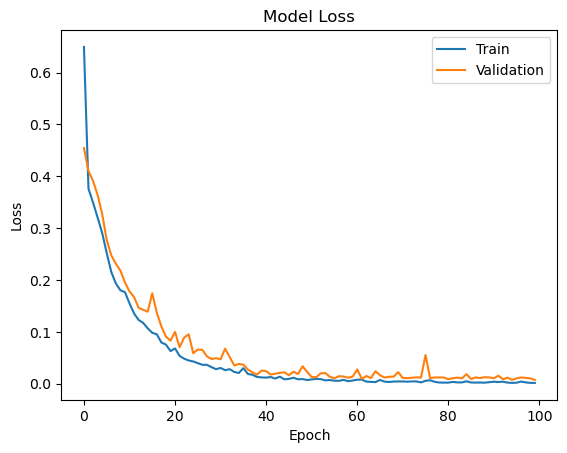

In [89]:
y_predicted = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)).flatten() * y_train_std + y_train_mean
y_test = y_test * y_train_std + y_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()